# Trends in Breast Cancer 

In [1]:
import sys
sys.path.insert(1, 'SetUp/')
import PackageInstall 
from PackageInstall import *

In [2]:
breastCancer = pd.read_csv("DataSets/BreastCancerDataSet.csv")
breastCancer_subsection = breastCancer.loc[1:,["diagnosis","radius_mean","texture_mean","perimeter_mean",
                                               "area_mean","smoothness_mean","compactness_mean","concavity_mean",
                                               "concave points_mean","symmetry_mean","fractal_dimension_mean"]]

In [3]:
breastCancer_subsection

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613
...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [4]:
malignant = breastCancer_subsection.loc[breastCancer_subsection["diagnosis"]=="M"] 
benign = breastCancer_subsection.loc[breastCancer_subsection["diagnosis"]=="B"]

In [16]:
describe(benign)

==================== Dataset Describe ====================
       radius_mean  texture_mean  perimeter_mean   area_mean  smoothness_mean  \
count   357.000000    357.000000      357.000000  357.000000       357.000000   
mean     12.146524     17.914762       78.075406  462.790196         0.092478   
std       1.780512      3.995125       11.807438  134.287118         0.013446   
min       6.981000      9.710000       43.790000  143.500000         0.052630   
25%      11.080000     15.150000       70.870000  378.200000         0.083060   
50%      12.200000     17.390000       78.180000  458.400000         0.090760   
75%      13.370000     19.760000       86.100000  551.100000         0.100700   
max      17.850000     33.810000      114.600000  992.100000         0.163400   

       compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
count        357.000000      357.000000           357.000000     357.000000   
mean           0.080085        0.046058             0

In [17]:
describe(malignant)

==================== Dataset Describe ====================
       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   211.000000    211.000000      211.000000   211.000000   
mean     17.460332     21.658104      115.330142   978.269194   
std       3.211384      3.708042       21.900590   368.809660   
min      10.950000     11.890000       71.900000   361.600000   
25%      15.070000     19.355000       98.710000   705.000000   
50%      17.300000     21.460000      114.200000   930.900000   
75%      19.590000     23.780000      129.950000  1204.500000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       211.000000        211.000000      211.000000           211.000000   
mean          0.102825          0.144560        0.160114             0.087710   
std           0.012593          0.053335        0.074578             0.034212   
min           0.073710         

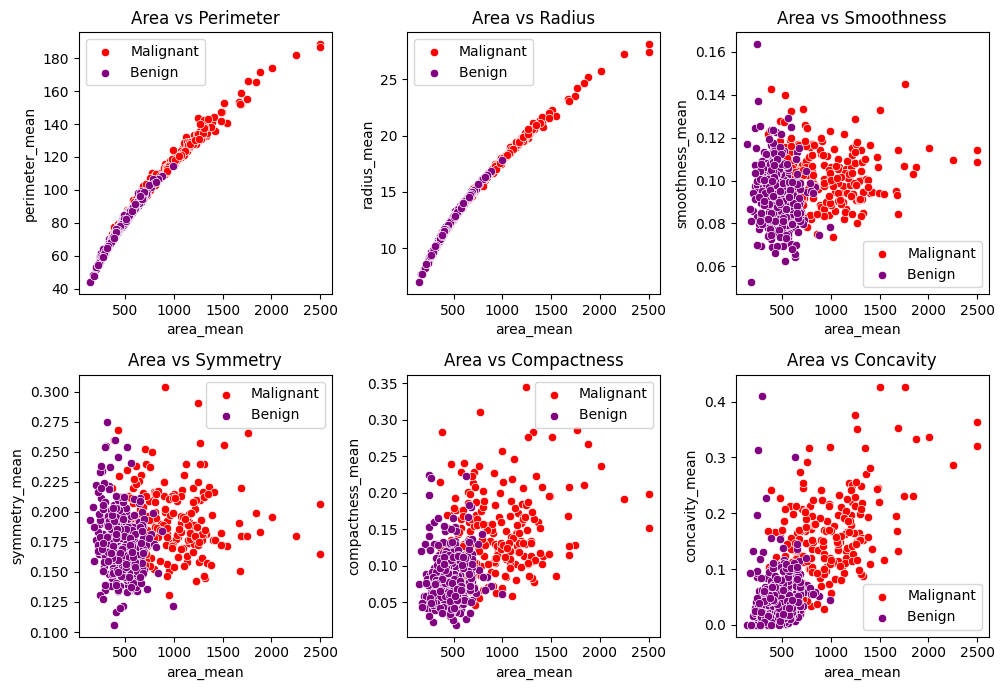

<Figure size 640x480 with 0 Axes>

In [8]:
def area_graphs (yaxis, position):
    plt.subplot(2, 3, position)
    sns.scatterplot(data = malignant, x = "area_mean", y = yaxis, legend = True, color = 'red')
    sns.scatterplot(data = benign, x= "area_mean", y = yaxis, legend = True, color = 'purple')
    plt.legend(labels=["Malignant", "Benign "])
    
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 7), tight_layout=False)
area_graphs("perimeter_mean", 1)
plt.title("Area vs Perimeter")

area_graphs("radius_mean", 2)
plt.title("Area vs Radius")

area_graphs("smoothness_mean", 3)
plt.title("Area vs Smoothness")

area_graphs("symmetry_mean", 4)
plt.title("Area vs Symmetry")

area_graphs("compactness_mean", 5)
plt.title("Area vs Compactness")

area_graphs("concavity_mean", 6)
plt.title("Area vs Concavity")


plt.show()
plt.clf()



Text(0.5, 1.0, 'Hist: mean concavity of Benign Case')

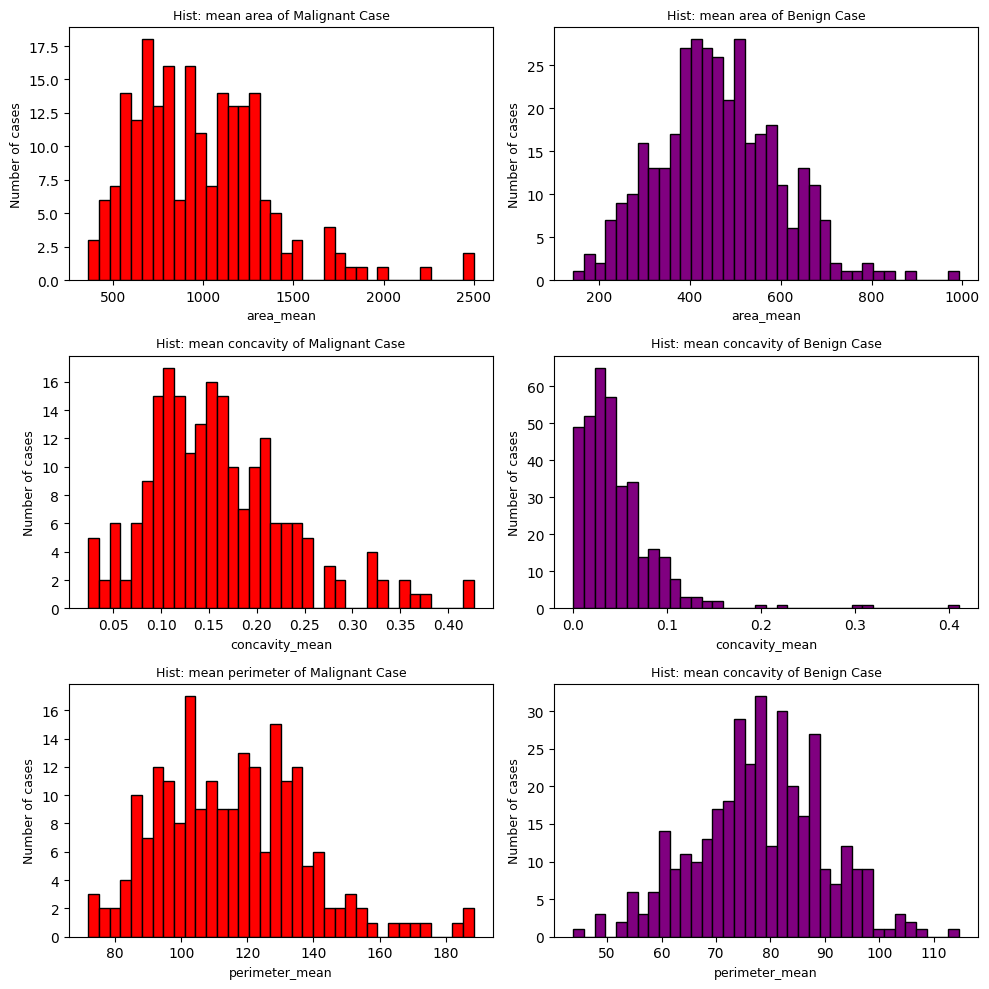

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10), tight_layout=False)

def distributionGraphs_malignant(measurement, position):
    plt.subplot(3, 2, position)
    plt.hist( malignant[measurement], color = 'red', edgecolor = 'black',bins = int(180/5))
    plt.xlabel(measurement, size = 9)
    plt.ylabel('Number of cases', size = 9)
    
def distributionGraphs_benign(measurement, position):
    plt.subplot(3, 2, position)
    plt.hist( benign [measurement], color = 'purple', edgecolor = 'black',bins = int(180/5))
    plt.xlabel(measurement, size = 9)
    plt.ylabel('Number of cases', size = 9)

distributionGraphs_malignant('area_mean', 1)
plt.title('Hist: mean area of Malignant Case', size = 9)
distributionGraphs_malignant('concavity_mean', 3)
plt.title('Hist: mean concavity of Malignant Case', size = 9)
distributionGraphs_malignant('perimeter_mean', 5)
plt.title('Hist: mean perimeter of Malignant Case', size = 9)

distributionGraphs_benign('area_mean', 2)
plt.title('Hist: mean area of Benign Case', size = 9)
distributionGraphs_benign('concavity_mean', 4)
plt.title('Hist: mean concavity of Benign Case', size = 9)
distributionGraphs_benign('perimeter_mean', 6)
plt.title('Hist: mean concavity of Benign Case', size = 9)



In [11]:
ref("2_BreastCancer_TrendsInBenignAndMalignantCells")

['1. ', '2. ', '3. ', '4. ']